In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
mpl.style.use('ggplot')

In [146]:
df = pd.read_csv('sample_data/train.csv')

In [118]:
column = 'num_sold'
df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))

In [147]:
df.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [148]:
df.shape

(136950, 6)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


**backup copy**

In [150]:
backup_df = df.copy()

## Cleaning Data

In [151]:
df['country'].unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [152]:
# df = df[df['country'].str.isnumeric()]
df['store'].unique()

array(['Kaggle Learn', 'Kaggle Store', 'Kagglazon'], dtype=object)

In [153]:
df['product'].unique()

array(['Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'], dtype=object)

In [154]:
df['num_sold'].unique()

array([  63,   66,    9, ..., 1380, 1333, 1247])

In [155]:
df['date'].unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', ..., '2021-12-29',
       '2021-12-30', '2021-12-31'], dtype=object)

**Found Nan values in each column**

In [128]:
df.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [129]:
df = df[~df['num_sold'].isna()]
df

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,0.044267
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,0.046444
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,0.005080
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,0.041364
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,0.034107
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,0.506531
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,0.544267
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,0.079100
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,0.463716


In [156]:
df.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

#### num_sold. Change to integer

In [157]:
df['num_sold'] = df['num_sold'].astype(int)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


**Remove the names from priduct column which are not relevent**

In [159]:
df = df[df['product']!='Using LLMs to Wr']
df

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [160]:
df['product'].unique()

array(['Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'], dtype=object)

**Clean the product name just keep the name of the product from whole string**

In [161]:
df['product'] = df['product'].str.split(' ').str.slice(3,).str.join(' ')

In [162]:
df['product'].unique()

array(['Improve Your Coding', 'Train More LLMs',
       'Win Friends and Influence People', 'Win More Kaggle Competitions',
       'Write Better'], dtype=object)

In [163]:
df.shape

(136950, 6)

**Remove the Date Column**

In [164]:
df = df.drop(['date'], axis=1)

#### Resetting the index of the final cleaned data

In [165]:
df = df.reset_index(drop=True)

## Cleaned Data

In [166]:
df

,id,country,store,product,num_sold
0,0,Argentina,Kaggle Learn,Improve Your Coding,63
1,1,Argentina,Kaggle Learn,Train More LLMs,66
2,2,Argentina,Kaggle Learn,Win Friends and Influence People,9
3,3,Argentina,Kaggle Learn,Win More Kaggle Competitions,59
4,4,Argentina,Kaggle Learn,Write Better,49
...,...,...,...,...,...
136945,136945,Spain,Kagglazon,Improve Your Coding,700
136946,136946,Spain,Kagglazon,Train More LLMs,752
136947,136947,Spain,Kagglazon,Win Friends and Influence People,111
136948,136948,Spain,Kagglazon,Win More Kaggle Competitions,641


**Store cleaned data into a csv file**

In [167]:
df.to_csv('Cleaned_sales_data.csv')

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   country   136950 non-null  object
 2   store     136950 non-null  object
 3   product   136950 non-null  object
 4   num_sold  136950 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 5.2+ MB


In [169]:
df.describe()[['num_sold']]

,num_sold
count,136950.000000
mean,165.522636
std,183.691575
min,2.000000
25%,46.000000
50%,98.000000
75%,184.000000
max,1380.000000


<ipython-input-170-889cd2538381>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'Greens')


<Axes: >

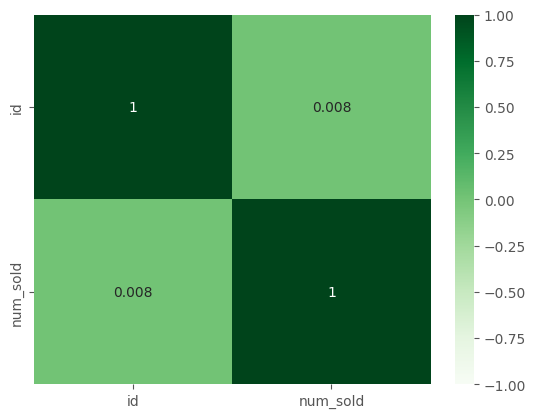

In [170]:
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'Greens')

**Check for Ouliers in num_sold**

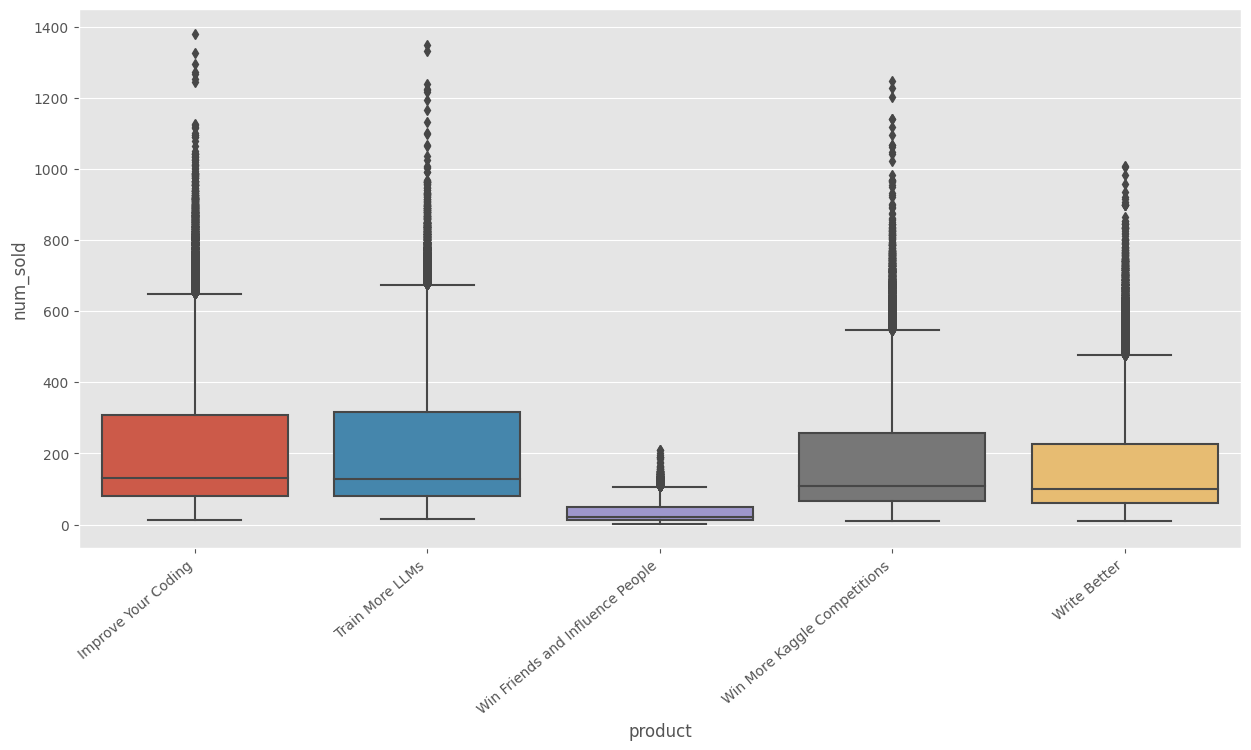

In [171]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x= 'product',y='num_sold',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<Axes: xlabel='num_sold'>

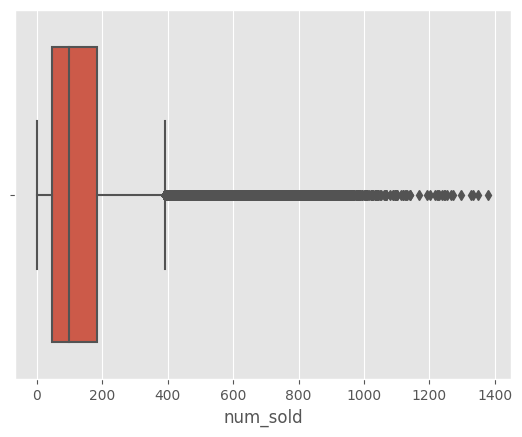

In [172]:
sns.boxplot(x= df["num_sold"])

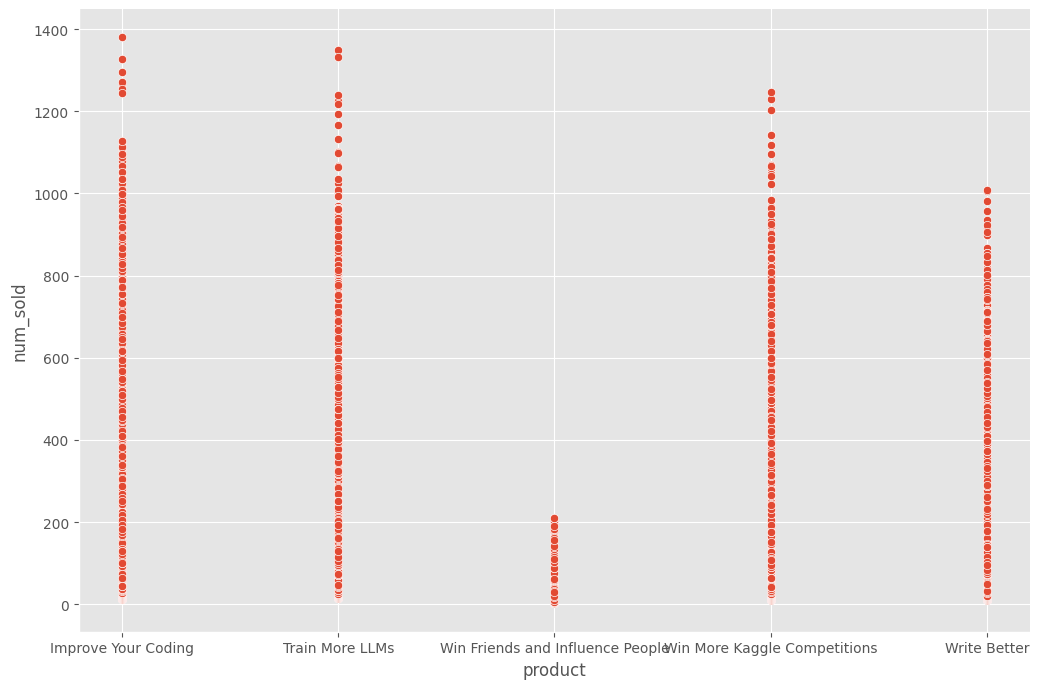

In [173]:
sns.relplot(x='product',y='num_sold',data = df,height=7,aspect=1.5)

In [30]:
Q1 = np.percentile(df['num_sold'], 25, method = 'midpoint')
Q3 = np.percentile(df['num_sold'], 75, method = 'midpoint')
IQR = Q3 - Q1

In [31]:
# Above Upper bound
upper = Q3+(1.5*IQR)
upper_array=np.array(df['num_sold']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower = Q1-(1.5*IQR)
lower_array=np.array(df['num_sold']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: 391.0
18979
Lower Bound: -161.0
0


In [32]:
upper_array = np.where(df['num_sold']>=upper)[0]
lower_array = np.where(df['num_sold']<=lower)[0]

In [33]:
df.drop(index = upper_array, inplace=True)
df.drop(index = lower_array, inplace=True)

In [ ]:
# df[df['num_sold']>1000]

,id,country,store,product,num_sold
25,25,Canada,Kagglazon,Improve Your Coding,1041
26,26,Canada,Kagglazon,Train More LLMs,1101
28,28,Canada,Kagglazon,Win More Kaggle Competitions,1062
18925,18925,Canada,Kagglazon,Improve Your Coding,1029
27101,27101,Canada,Kagglazon,Train More LLMs,1005
27175,27175,Canada,Kagglazon,Improve Your Coding,1090
27176,27176,Canada,Kagglazon,Train More LLMs,1067
27178,27178,Canada,Kagglazon,Win More Kaggle Competitions,1118
27250,27250,Canada,Kagglazon,Improve Your Coding,1118
27251,27251,Canada,Kagglazon,Train More LLMs,1167


### Checking relationship of country with num_sold

In [174]:
import seaborn as sns

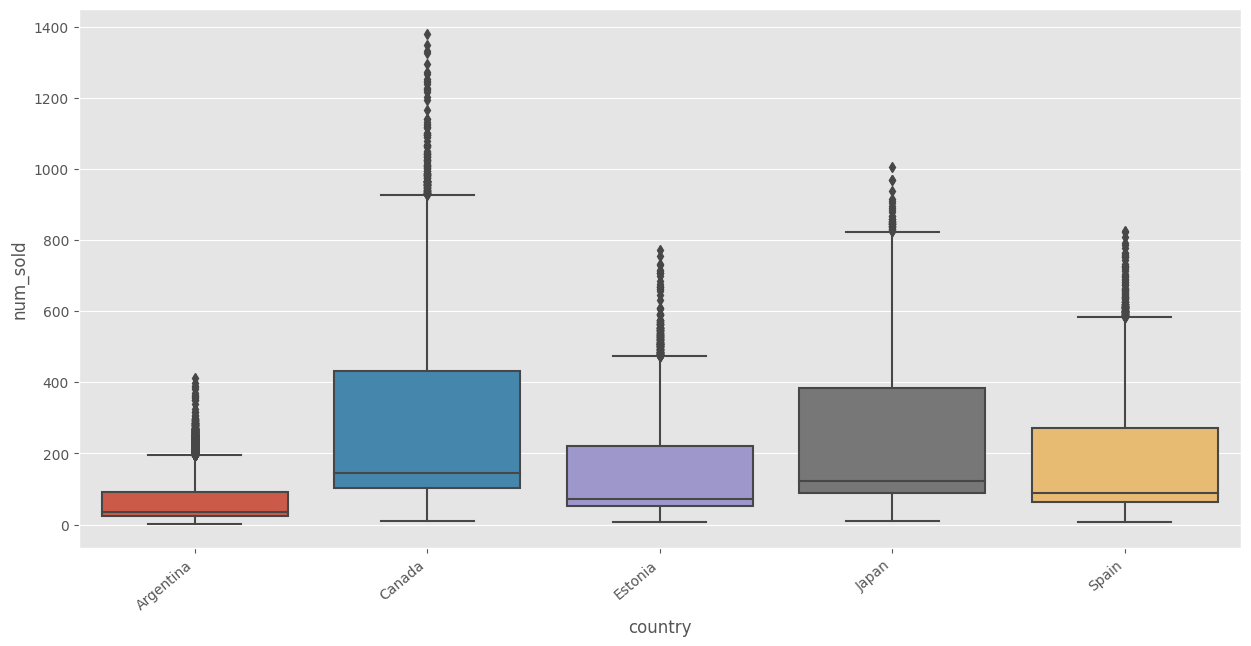

In [175]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='country',y='num_sold',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**Extracting training and test set data**

In [176]:
X = df[['country','store','product']]
y = df['num_sold']

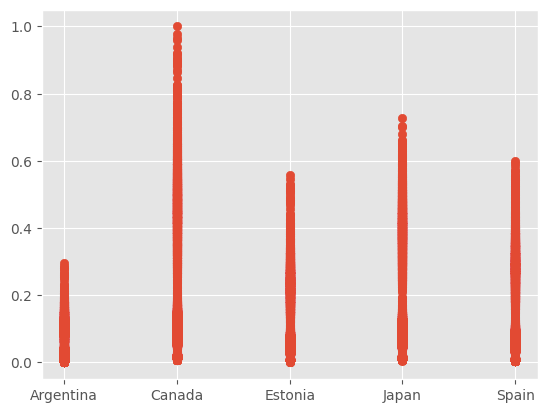

In [151]:
# plt.scatter(X, y)
# plt.show()

**saving the test data set in test.csv file**

In [ ]:
# X.to_csv('test.csv')

In [177]:
y.shape

(136950,)

**Applying Train Test Split**

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

**Creating an OneHotEncoder object to contain all the possible categories**

In [181]:
ohe=OneHotEncoder()
ohe.fit(X[['country','store','product']])

OneHotEncoder()

In [198]:
ohe

OneHotEncoder()


**Creating a column transformer to transform categorical columns**

In [182]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['country','store','product']),
                                    remainder='passthrough')

**Linear Regression Model**

In [183]:
lr = LinearRegression()

**Making a pipeline**

In [184]:
pipe = make_pipeline(column_trans,lr)

** Fitting the  model**

In [185]:
pipe.fit(X_train,y_train)
# pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object),
                                                                            array(['Kagglazon', 'Kaggle Learn', 'Kaggle Store'], dtype=object),
                                                                            array(['Improve Your Coding', 'Train More LLMs',
       'Win Friends and Influence People', 'Win More Kaggle Competitions',
       'Write Better'], dtype=object)]),
                                                  ['country', 'store',
                                                   'product'])])),
                ('linearregression', LinearRegression())])

**read test data from test.csv**

In [186]:
y_pred = pipe.predict(X_test)
# y_pred = pipe.predict(test_x)

**Store prediction in submission file**

**Checking R2 Score**

In [187]:
r2_score(y_test, y_pred)

0.746740841072854

**Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score**

In [188]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [189]:
np.argmax(scores)

646

In [190]:
scores[np.argmax(scores)]

0.754838457970351

In [191]:
pipe.predict(pd.DataFrame(columns = X_test.columns, data = np.array(['Spain', 'Kaggle Learn',	'Write Better']).reshape(1,3)))

array([57.24715886])

#### The best model is found at a certain random state

In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7563557932467673

In [113]:
len(y_pred)

13695

In [193]:
import pickle

In [194]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [195]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)